In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from thesis_tools.statistical_tests.test_statistics import R_stat

In [3]:
def draw_log_pareto(a, m, n_samples):
    samples = (np.random.pareto(a, n_samples) + 1) * m
    log_samples = np.log(samples)
    # compute the first 4 R stats
    R_hats = {}
    for i in range(2, 6):
        R = R_stat(data=log_samples, order=i)
        R_hats[f"R_hat_{i}"] = R
    return R_hats

In [4]:
n_sims = 100000
results = []
for i in range(n_sims):
    results.append(draw_log_pareto(1, 1, 40))
df = pd.DataFrame(results)

In [5]:
df

,R_hat_2,R_hat_3,R_hat_4,R_hat_5
0,1.023050,1.018943,0.916166,0.722728
1,1.068517,1.153841,1.176894,1.086293
2,0.822951,0.597061,0.383747,0.218018
3,0.970321,0.838310,0.616982,0.386366
4,0.900233,0.712474,0.488358,0.292474
...,...,...,...,...
99995,1.221507,1.501134,1.619400,1.488219
99996,0.870244,0.694965,0.508434,0.334627
99997,0.857916,0.683865,0.490535,0.307119
99998,1.046322,1.072004,0.991146,0.795123


(0.7, 1.8)

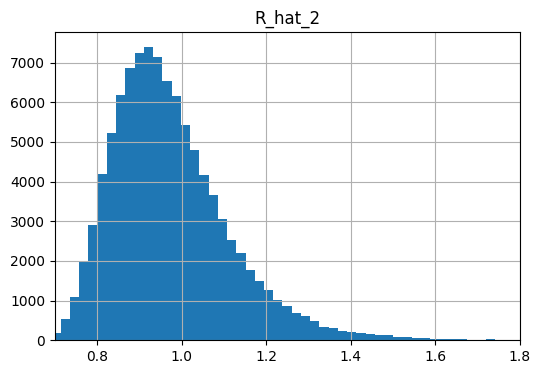

In [6]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_2", bins=100, ax=ax)
ax.set_xlim(0.7, 1.8)

(0.3, 2.5)

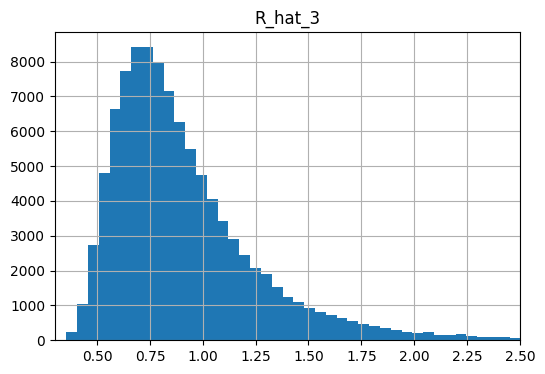

In [7]:
# histogram of R_hats
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
df.hist(column="R_hat_3", bins=200, ax=ax)
ax.set_xlim(0.3, 2.5)

In [8]:
quantiles = df.quantile([0.025, 0.05, 0.95, 0.975])
quantiles

,R_hat_2,R_hat_3,R_hat_4,R_hat_5
0.025,0.766349,0.483207,0.257317,0.117471
0.050,0.788994,0.519099,0.290514,0.139976
0.950,1.236267,1.649192,2.099861,2.390986
0.975,1.314020,1.945179,2.768855,3.499941
